* https://cloud.google.com/vision/docs/reference/libraries#client-libraries-install-python
* https://cloud.google.com/vision/docs/reference/rest/
* https://cloud.google.com/docs/authentication/api-keys
* https://google-auth.readthedocs.io/en/latest/user-guide.html#service-account-private-key-files

* sudo pip3 install --upgrade google-cloud-vision
* sudo pip3 install --upgrade google-oauth

First enable the your API key to use Cloud Vision - will have to setup a billing account.

Follow the instructions on https://cloud.google.com/docs/authentication/getting-started to download your API key, which is a .json file. The path to this file is saved to the environment variable GOOGLE_APPLICATION_CREDENTIALS which in my case was set with 

 export GOOGLE_APPLICATION_CREDENTIALS=/Users/robincole/Desktop/Google_API_key.json

In [1]:
import io
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types
from google.oauth2 import service_account

In [2]:
API_file_path = "/Users/robincole/Desktop/Google_API_key.json"

In [3]:
credentials = service_account.Credentials.from_service_account_file(API_file_path)
scoped_credentials = credentials.with_scopes(['https://www.googleapis.com/auth/cloud-platform'])

In [4]:
# If unable to set envirnoment varible, set it manually here 

#os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/robincole/Desktop/Google_API_key.json"
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"] 
#client = vision.ImageAnnotatorClient()

In [5]:
# Instantiates a client
client = vision.ImageAnnotatorClient(credentials=scoped_credentials)

In [6]:
#client = vision.ImageAnnotatorClient(credentials=API_file_path)

Open an image file

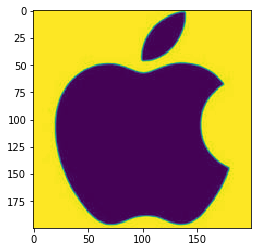

In [7]:
# The name of the image file to annotate
file_name = 'resources/apple.jpg'

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()


img = plt.imread(file_name)
plt.imshow(img)
plt.show()

## Labels

In [8]:
%%time
image = types.Image(content=content)
# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

CPU times: user 214 ms, sys: 24.3 ms, total: 239 ms
Wall time: 3.38 s


In [9]:
print('Labels:')
for label in labels:
    print(label.description, label.score)

Labels:
black 0.9576180577278137
black and white 0.8097735643386841
graphics 0.5925842523574829
font 0.5714111924171448
logo 0.5107734203338623


## Logo

not finding the apple??

In [10]:
%%time
response = client.logo_detection(image=image)
logos = response.logo_annotations

CPU times: user 2.03 ms, sys: 1.6 ms, total: 3.63 ms
Wall time: 112 ms


In [11]:
print('Logos:')

for logo in logos:
    print(logo.description)

Logos:


In [12]:
response

## Face

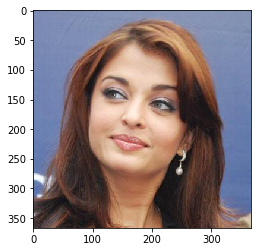

In [13]:
file_name = 'resources/face.jpg'

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()


img = plt.imread(file_name)
plt.imshow(img)
plt.show()

In [14]:
%%time
image = types.Image(content=content)
response = client.face_detection(image=image)
faces = response.face_annotations  

CPU times: user 3.27 ms, sys: 1.53 ms, total: 4.8 ms
Wall time: 544 ms


In [15]:
# Names of likelihood from google.cloud.vision.enums
likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')

print("There are {} faces".format(len(faces)))

print('Faces:')
for face in faces:
    print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
    print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
    print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in face.bounding_poly.vertices])

    print('face bounds: {}'.format(','.join(vertices)))

There are 1 faces
Faces:
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (36,35),(281,35),(281,320),(36,320)


## Properties

In [16]:
def detect_properties_uri(uri):
    """Detects image properties in the file located in Google Cloud Storage or
    on the Web."""
    image = types.Image()
    image.source.image_uri = uri

    response = client.image_properties(image=image)
    props = response.image_properties_annotation
    print('Properties:')

    for color in props.dominant_colors.colors:
        print('frac: {}'.format(color.pixel_fraction))
        print('\tr: {}'.format(color.color.red))
        print('\tg: {}'.format(color.color.green))
        print('\tb: {}'.format(color.color.blue))
        print('\ta: {}'.format(color.color.alpha))

In [17]:
url = "https://upload.wikimedia.org/wikipedia/commons/4/4f/Matterhorn_Riffelsee_2005-06-11.jpg"
detect_properties_uri(url)

Properties:
frac: 0.12794612348079681
	r: 64.0
	g: 114.0
	b: 205.0
	a: 
frac: 0.04781144857406616
	r: 236.0
	g: 234.0
	b: 238.0
	a: 
frac: 0.035555556416511536
	r: 91.0
	g: 144.0
	b: 225.0
	a: 
frac: 0.013939393684267998
	r: 101.0
	g: 80.0
	b: 51.0
	a: 
frac: 0.04612794518470764
	r: 33.0
	g: 52.0
	b: 104.0
	a: 
frac: 0.2136026918888092
	r: 42.0
	g: 89.0
	b: 182.0
	a: 
frac: 0.05191919207572937
	r: 198.0
	g: 194.0
	b: 200.0
	a: 
frac: 0.0385185182094574
	r: 157.0
	g: 154.0
	b: 163.0
	a: 
frac: 0.031313132494688034
	r: 125.0
	g: 120.0
	b: 129.0
	a: 
frac: 0.020875420421361923
	r: 119.0
	g: 119.0
	b: 142.0
	a: 


## LANDMARK

In [18]:
def detect_landmarks_uri(uri):
    """Detects landmarks in the file located in Google Cloud Storage or on the
    Web."""
    image = types.Image()
    image.source.image_uri = uri

    response = client.landmark_detection(image=image)
    landmarks = response.landmark_annotations
    print('Landmarks:')

    for landmark in landmarks:
        print(landmark.description)

In [19]:
%%time
detect_landmarks_uri(url)

Landmarks:
Matterhorn
CPU times: user 1.9 ms, sys: 1.83 ms, total: 3.73 ms
Wall time: 809 ms
